In [1]:
# Import necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

As we saw last week, we will download a dataset from Kaggle and load it in Python using `pandas`.

In [8]:
# Insert your code here
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jaderz/hospital-beds-management")

print("Path to dataset files:", path)
print("Path to the file of this project: "+path+"/patients.csv")

Path to dataset files: /home/cgraiff/.cache/kagglehub/datasets/jaderz/hospital-beds-management/versions/1
Path to the file of this project: /home/cgraiff/.cache/kagglehub/datasets/jaderz/hospital-beds-management/versions/1/patients.csv


In [ ]:
# Open dataset as pandas dataframe
df = pd.read_csv('/home/cgraiff/.cache/kagglehub/datasets/jaderz/hospital-beds-management/versions/1/patients.csv') #change with your path (printed above)
# Visualize the first 5 rows of dataframe
print(df.head())

     patient_id               name  age arrival_date departure_date  \
0  PAT-09484753  Richard Rodriguez   24   2025-03-16     2025-03-22   
1  PAT-f0644084     Shannon Walker    6   2025-12-13     2025-12-14   
2  PAT-ac6162e4       Julia Torres   24   2025-06-29     2025-07-05   
3  PAT-3dda2bb5    Crystal Johnson   32   2025-10-12     2025-10-23   
4  PAT-08591375        Garrett Lin   25   2025-02-18     2025-02-25   

            service  satisfaction  
0           surgery            61  
1           surgery            83  
2  general_medicine            83  
3         emergency            81  
4               ICU            76  


In [ ]:
print(df.isnull().sum())

patient_id        0
name              0
age               0
arrival_date      0
departure_date    0
service           0
satisfaction      0
dtype: int64


In [ ]:
df.sort_values(by='satisfaction', ascending=True)

,patient_id,name,age,arrival_date,departure_date,service,satisfaction
745,PAT-46dc1924,Melissa Abbott,6,2025-11-01,2025-11-08,surgery,60
10,PAT-003ce690,Larry Dixon,29,2025-01-19,2025-01-21,ICU,60
12,PAT-69dc0dc1,April Frost,37,2025-11-15,2025-11-19,general_medicine,60
565,PAT-7831a60c,Larry Harris,27,2025-11-06,2025-11-12,ICU,60
494,PAT-bc8933d5,Mrs. Virginia Daniels,43,2025-12-25,2025-12-29,general_medicine,60
...,...,...,...,...,...,...,...
308,PAT-26a57bc7,Jeffrey Mills,10,2025-09-28,2025-09-29,surgery,99
96,PAT-8f6d5fa4,Bryan Herrera,27,2025-03-22,2025-03-24,emergency,99
49,PAT-84559395,Jamie Smith,72,2025-03-14,2025-03-23,surgery,99
50,PAT-581a47d8,Paul Castaneda,16,2025-08-05,2025-08-18,emergency,99


In [ ]:
df['service'].nunique()

4

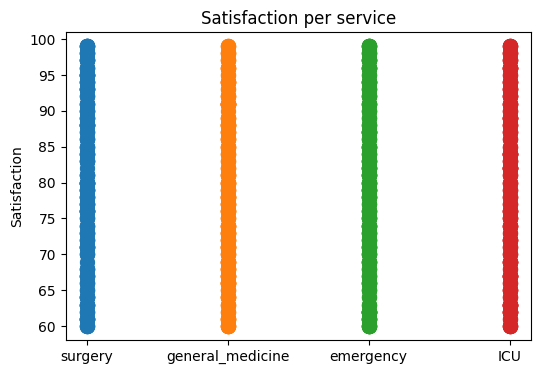

In [ ]:
plt.figure(figsize=(6,4))
for specialty in df['service'].unique():
    values = df[df['service'] == specialty]['satisfaction']
    plt.scatter([specialty]*len(values), values, s=100)  # s = marker size

plt.ylabel('Satisfaction')
plt.title('Satisfaction per service')
plt.show()

This is not informative at all - the satisfaction for all the services seems to lie in the range between 60 and 100. How can we further investigate to see if any of these specialties presents some interesting characteristics? For example, how can we know if on average, one of the specialties has a lower satisfaction level?
> Hint: We want an **intuitive way** of visualizing it - we do not want to compute the average or other summary statistics.

A solution is represented by **boxplots**:

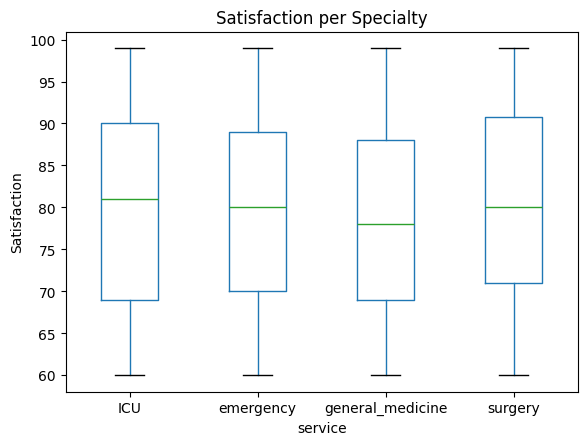

In [ ]:
df.boxplot(column='satisfaction', by='service', grid=False)
plt.title('Satisfaction per Specialty')
plt.suptitle('')
plt.ylabel('Satisfaction')
plt.show()

It can also be useful to overlap two different visualization techniques. This will help you notice important details about the distributions - for example, you could have only a few outliers, or the data can be more uniform.

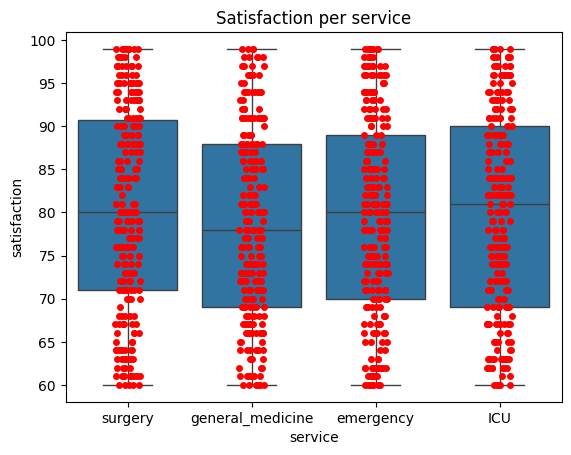

In [ ]:
sns.boxplot(x='service', y='satisfaction', data=df)
sns.stripplot(x='service', y='satisfaction', data=df, color='red', size=5, jitter=True)
plt.title('Satisfaction per service')
plt.show()

/tmp/ipykernel_496181/3146568198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='service', y='satisfaction', data=df, inner='point', palette='pastel')


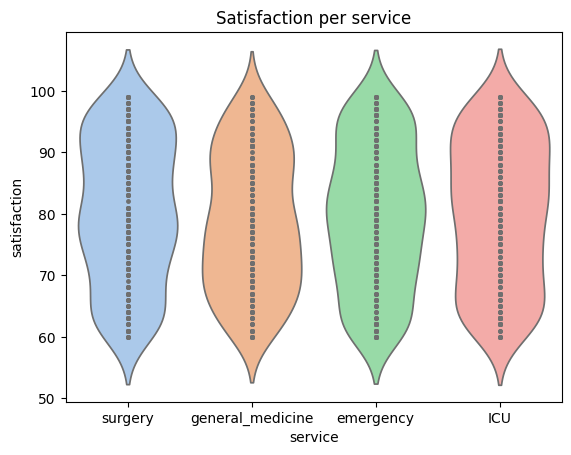

In [ ]:
sns.violinplot(x='service', y='satisfaction', data=df, inner='point', palette='pastel')
plt.title('Satisfaction per service')
plt.show()

We saw that the satisfaction score does not greatly vary between specialties, but for example general medicine has a lower satisfaction score on average. We can also check the distribution of patient satisfaction scores.

Text(0.5, 0, 'Satisfaction Score')

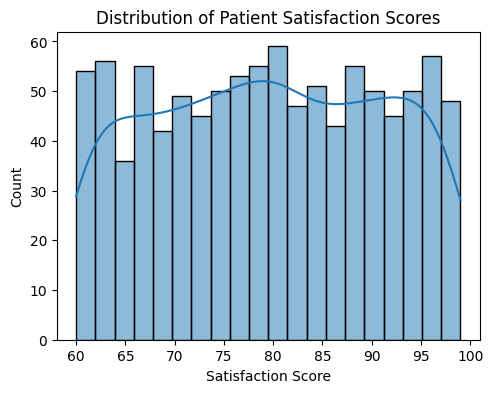

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['satisfaction'], kde=True, bins=20)
plt.title('Distribution of Patient Satisfaction Scores')
plt.xlabel('Satisfaction Score')

OK, cool - but these are general scores. Let's check the same distribution, but **only for general medicine**.

In [ ]:
df_gm = df[df['service'] == 'general_medicine']
df_gm

,patient_id,name,age,arrival_date,departure_date,service,satisfaction
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
8,PAT-f9c8afa6,Victor Baker,50,2025-07-30,2025-08-13,general_medicine,91
11,PAT-18f78014,Kenneth Scott,77,2025-06-24,2025-06-26,general_medicine,61
12,PAT-69dc0dc1,April Frost,37,2025-11-15,2025-11-19,general_medicine,60
15,PAT-0beb4754,Erin Edwards,86,2025-10-15,2025-10-17,general_medicine,66
...,...,...,...,...,...,...,...
980,PAT-b3ba89f4,Vincent Reyes,60,2025-12-05,2025-12-10,general_medicine,91
981,PAT-1d5f8550,Curtis Watson,65,2025-05-18,2025-05-20,general_medicine,61
983,PAT-0af52f3d,Michael Sims,30,2025-03-29,2025-03-30,general_medicine,70
989,PAT-0307a640,Steven Howard,11,2025-10-10,2025-10-11,general_medicine,61


Text(0.5, 0, 'Satisfaction Score')

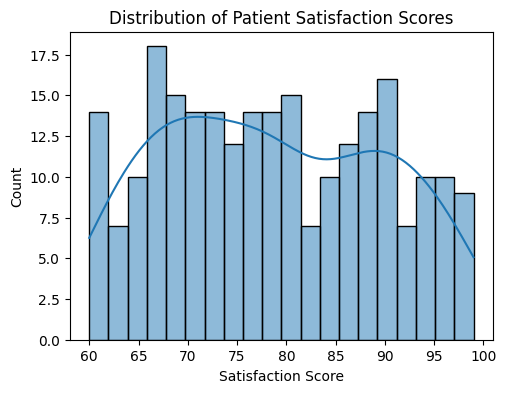

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_gm['satisfaction'], kde=True, bins=20)
plt.title('Distribution of Patient Satisfaction Scores')
plt.xlabel('Satisfaction Score')

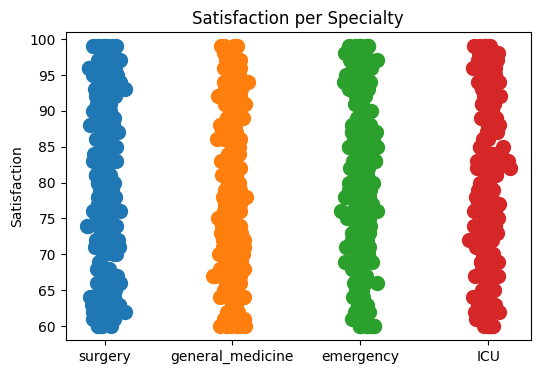

In [ ]:
plt.figure(figsize=(6,4))
specialties = df['service'].unique()
for i, specialty in enumerate(specialties):
    y = df[df['service'] == specialty]['satisfaction']
    x = np.random.normal(i, 0.05, size=len(y))  # small horizontal jitter
    plt.scatter(x, y, s=100)
    
plt.xticks(range(len(specialties)), specialties)
plt.ylabel('Satisfaction')
plt.title('Satisfaction per Specialty')
plt.show()

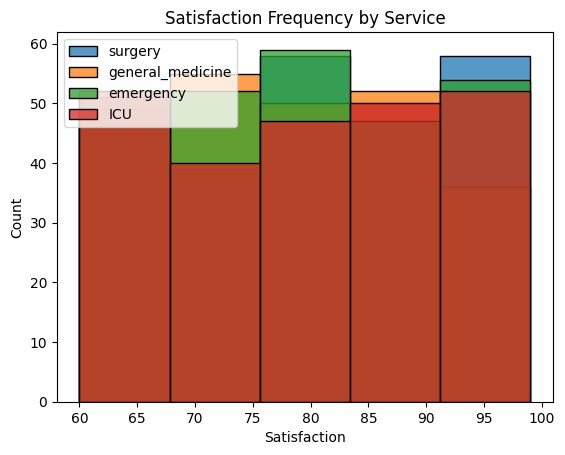

In [ ]:
specialties = df['service'].unique()
for s in specialties:
    sns.histplot(df[df['service'] == s]['satisfaction'], bins=5, kde=False, label=s)
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.legend()
plt.title('Satisfaction Frequency by Service')
plt.show()

Now, let's focus instead on the dataset with weekly data.

In [9]:
services_df = pd.read_csv(f'{path}/services_weekly.csv')
services_df

,week,month,service,available_beds,patients_request,patients_admitted,patients_refused,patient_satisfaction,staff_morale,event
0,1,1,emergency,32,76,32,44,67,70,none
1,1,1,surgery,45,130,45,85,83,78,flu
2,1,1,general_medicine,37,201,37,164,97,43,flu
3,1,1,ICU,22,31,22,9,84,91,flu
4,2,1,emergency,28,169,28,141,75,64,none
...,...,...,...,...,...,...,...,...,...,...
203,51,12,ICU,18,15,15,0,87,80,none
204,52,12,emergency,26,130,26,104,88,63,none
205,52,12,surgery,53,39,39,0,82,50,none
206,52,12,general_medicine,65,225,65,160,82,40,flu


The dataset is called "weekly". However, we can see from the head of the dataset that the values are divided per month as well. The month is indicated by its calendar number (1 to 12). 
> When in doubt, remember you can check dataset metadata directly on Kaggle.
We will thus **group all the data per month**, in order to visualize patterns per month.

In [20]:
# Monthly trends
monthly_summary = services_df.groupby('month', as_index=False).agg({
    'patients_request': 'sum',
    'patients_admitted': 'sum',
    'patients_refused': 'sum',
    'patient_satisfaction': 'mean',
    'staff_morale': 'mean'
})
print("\nMonthly Trends:")
print(monthly_summary)


Monthly Trends:
    month  patients_request  patients_admitted  patients_refused  \
0       1              1532                507              1025   
1       2              1607                513              1094   
2       3              1176                408               768   
3       4              1084                431               653   
4       5               778                396               382   
5       6               801                360               441   
6       7               653                340               313   
7       8               686                350               336   
8       9               729                438               291   
9      10               837                493               344   
10     11              1040                508               532   
11     12              2570               1107              1463   

    patient_satisfaction  staff_morale  
0               78.43750       73.8750  
1               

In [27]:
plt.plot(monthly_summary['patients_admitted'], monthly_summary['month'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

Here, we used `agg()`, an useful aggregation function of `pandas`. We used it together with `groupby`. Here comes a quick explanation of what we did - if you are confused or want to know more, **check out the supplementary materials** for an explanation.